In [1]:
from torchvision.transforms import ToTensor
import rasterio
from rasterio.plot import show
import numpy as np
import geopandas as gp
from matplotlib.pyplot import plot
import rasterio.mask
import matplotlib.pyplot as plt
from utils import *

lakes_train_test = "/data1/malto/sigspatial/lakes_regions.gpkg"
predicted_poly_path = "/home/csavelli/sigspatialcup2023/GPKG/lake_polygons_test.gpkg"
regions = gp.read_file(lakes_train_test)
predicted_poly = gp.read_file(predicted_poly_path)

In [2]:
regions

,region_num,geometry
0,1,"POLYGON ((-5449321.891 10875536.208, -5484512...."
1,2,"POLYGON ((-5581347.050 10549567.616, -5667660...."
2,3,"POLYGON ((-5677516.471 10248298.652, -5678009...."
3,4,"POLYGON ((-5678009.204 9927217.104, -5677904.5..."
4,5,"POLYGON ((-2366209.810 15614995.673, -2476111...."
5,6,"POLYGON ((-3526251.976 14894948.043, -3462201...."


In [3]:
predicted_poly

,image,region_num,geometry
0,Greenland26X_22W_Sentinel2_2019-07-31_25.tif,1,"POLYGON ((-5251204.73393 10636843.09137, -5250..."
1,Greenland26X_22W_Sentinel2_2019-07-31_25.tif,1,"POLYGON ((-5255179.45941 10858434.03636, -5255..."
2,Greenland26X_22W_Sentinel2_2019-07-31_25.tif,1,"POLYGON ((-5256211.35929 10820635.92588, -5256..."
3,Greenland26X_22W_Sentinel2_2019-07-31_25.tif,1,"POLYGON ((-5258466.25162 10659468.45174, -5258..."
4,Greenland26X_22W_Sentinel2_2019-07-31_25.tif,1,"POLYGON ((-5258657.34419 10616778.37144, -5258..."
...,...,...,...
6204,Greenland26X_22W_Sentinel2_2019-06-19_20.tif,6,"POLYGON ((-3398332.94979 14032481.63591, -3398..."
6205,Greenland26X_22W_Sentinel2_2019-06-19_20.tif,6,"POLYGON ((-3457418.77265 14835605.49210, -3457..."
6206,Greenland26X_22W_Sentinel2_2019-06-19_20.tif,6,"POLYGON ((-3476719.12229 14844739.71698, -3476..."
6207,Greenland26X_22W_Sentinel2_2019-06-19_20.tif,6,"POLYGON ((-3488108.23951 14842408.38762, -3488..."


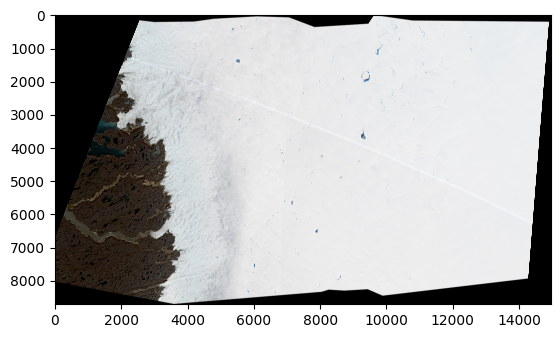

In [23]:
img_region_path = Path("/data1/malto/sigspatial/test/")
img = os.listdir(img_region_path)[0]
img_region = rasterio.open(img_region_path/ img)
img_array = img_region.read()
plt.imshow(np.transpose(img_array, ((1, 2, 0))))

In [21]:
os.listdir(img_region_path)

['Greenland26X_22W_Sentinel2_2019-08-25_29.tif_region_2.tif',
 'Greenland26X_22W_Sentinel2_2019-07-31_25.tif_region_5.tif',
 'Greenland26X_22W_Sentinel2_2019-06-03_05.tif_region_3.tif',
 'Greenland26X_22W_Sentinel2_2019-08-25_29.tif_region_6.tif',
 'Greenland26X_22W_Sentinel2_2019-07-31_25.tif_region_1.tif',
 'Greenland26X_22W_Sentinel2_2019-06-19_20.tif_region_4.tif',
 'Greenland26X_22W_Sentinel2_2019-07-31_25.tif_region_3.tif',
 'Greenland26X_22W_Sentinel2_2019-06-03_05.tif_region_1.tif',
 'Greenland26X_22W_Sentinel2_2019-06-19_20.tif_region_2.tif',
 'Greenland26X_22W_Sentinel2_2019-06-03_05.tif_region_5.tif',
 'Greenland26X_22W_Sentinel2_2019-08-25_29.tif_region_4.tif',
 'Greenland26X_22W_Sentinel2_2019-06-19_20.tif_region_6.tif']

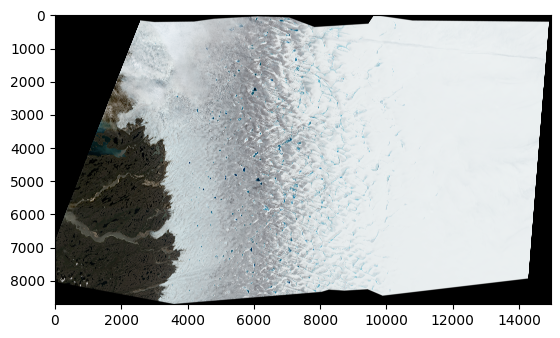

In [24]:
img_region_path = Path("/data1/malto/sigspatial/test/")
img = os.listdir(img_region_path)[8]
img_region = rasterio.open(img_region_path/ img)
img_array = img_region.read()
plt.imshow(np.transpose(img_array, ((1, 2, 0))))

In [25]:
img

'Greenland26X_22W_Sentinel2_2019-06-19_20.tif_region_2.tif'

In [26]:
lake_geom = predicted_poly[predicted_poly['region_num'] == '2']['geometry']

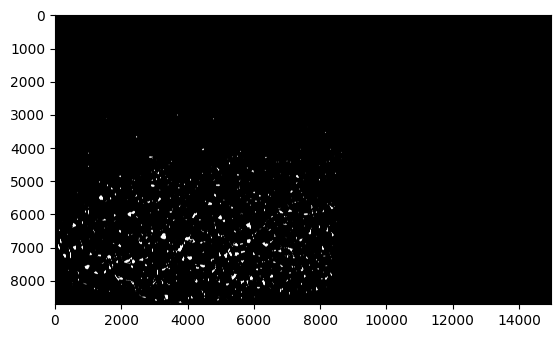

In [28]:
out_image, _ = rasterio.mask.mask(img_region, lake_geom)
out_image[out_image != 0] = 255

plt.imshow(np.transpose(out_image, ((1, 2, 0))))